# Divisiòn del conjunto de Datos

En este notebook se muestran en algunos de los mecanismos màs utilizados para la divisiòn del conjunto de datos.

## Conjunto de Datos

### Descripciòn

Ficheros
* KDDTrain+.ARFF: The full NSL-KDD train set with binary labels in ARFF format
* KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
* KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

## 1.- Lectura del conjunto de datos.

In [1]:
import arff
import pandas as pd

In [2]:
def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD."""
    with open(data_path, "r") as train_set:
        dataset = arff.load(train_set)
        attributes = [attr[0] for attr in dataset["attributes"]]
        return pd.DataFrame(dataset["data"], columns = attributes)

In [3]:
df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

# 2.-División del Conjunto de Datos.

Se debe separar el conjunto de datos o se debe separar el DataSet en los siguientes conjuntos necesarios para realizar los procesos de entrenamieto, validación y pruebas. Sklearn tiene implementada la función **split**

In [6]:
# Separar el conjunto de datos 60% train_set 40% Test_Set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.4, random_state = 42)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell 

In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell    

In [15]:
# Separa le conjunto de datos de pruebas 50% validation_set 50% test_set
from sklearn.model_selection import train_test_split
val_set, test_set = train_test_split(df, test_size = 0.5, random_state = 42)
train_set, test_set = train_test_split(df, test_size = 0.5, random_state = 42)

In [17]:
print ("Longitud de Train", len(train_set))

Longitud de Train 62986


In [18]:
print ("Longitud de test", len(test_set))

Longitud de test 62987


In [19]:
print ("Longitud de val", len(val_set))

Longitud de val 62986


# 3.-Particionado aleatorio y Stratified Sampling

Sklearn implementa la función **train_test_split_**, sin embargo, esta función por defecto realiza un particionado del conjunto de datos aleatorio para cada vez que se ejecuta el script. Aun añadiendo una semilla fija para generación aleatoria, cada vez que se cargue de nuevo el conjunto de datos se generaran nuevos subconjuntos. Esto puede ocasinar que después de muchos intentos, el algoritmo vea todo el conjunto de datos.

Para solucionar este problema sklearn ha introducido el parametro **Shuffle** en la funcion **train_test_split**

In [23]:
# Shuffle tiene dos caracteristicas enable(true) y disable(false), si shuffle es igual a disable el conjunto de datos no mezclara antes del particionado.
train_set, test_set = train_test_split(df, test_size = 0.5, random_state = 42, shuffle = False)

Estos metodos para dividir el conjunto de datos estan bien, si se tiene un conjunto de datos muy grande, de lo contrario, se corre el riesgo de introducir **sampling bias**.
Para evitar esto, se utiliza un metodo de samplin que se llama **Stratified Sampling**.
La población es dividida en subconjuntos homogeneos llamados strata. El objetivo es que no quede ninguna caracteristica del conjunto de datos sin representación en ninguno de los conjuntos de datos para una o más caracteristicas en particular

In [25]:
train_set, test_set = train_test_split(df, test_size = 0.4, random_state = 42, stratify=df["protocol_type"])

# 4.-Generacion de una funcion de Particionado

In [30]:
# Construccion de una funcion que realice el particionado completo
def train_val_test_split(df, rstate = 42, shuffle = True, stratify = None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size = 0.4, random_state = rstate, shuffle = shuffle, stratify = strat)
    strat = test_set[stratify] if stratify else None 
    val_set, test_set =train_test_split(
        test_set, test_size = 0.5, random_state = rstate, shuffle=shuffle, stratify = strat)
    return(train_set, val_set, test_set)

In [31]:
print ("Longitud del conjunto de datos:", len (df))

Longitud del conjunto de datos: 125973


In [32]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [33]:
print("Longitud Trining Set:", len(train_set))
print("Longitud Validation Set:", len(val_set))
print("Longitud Test Set", len(test_set))

Longitud Trining Set: 75583
Longitud Validation Set: 25195
Longitud Test Set 25195


<AxesSubplot: >

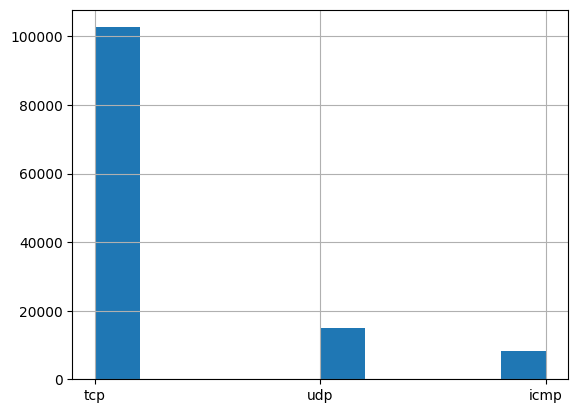

In [34]:
# Comprobacion de que stratify mantiene la proporcion de la caracteristica en los conjuntos
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()